In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import tree 
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
from sklearn.tree import export_graphviz
from sklearn import neural_network
from sklearn.ensemble import RandomForestClassifier 


In [51]:
df = pd.read_csv("german_credit.csv")
df.describe()

## target y variable is 'class'

,Creditability,Account Balance,Duration of Credit Mths,Payment Status of Previous Credit,Purpose,Credit Amount,Value of Savings and Stocks,Length of current employment,Instalment per cent,Sex and Marital Status,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [52]:
df.isnull().any()
## No null data in the df

Creditability                        False
Account Balance                      False
Duration of Credit Mths              False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value of Savings and Stocks          False
Length of current employment         False
Instalment per cent                  False
Sex and Marital Status               False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age                                  False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [53]:
x = df.drop(columns='class')
y = df['class']

KeyError: "['class'] not found in axis"

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
f = SelectKBest(score_func= f_regression, k = 10)
f = f.fit(x,y).get_support()

In [ ]:
x.columns[f]

Index(['Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51'],
      dtype='object')

In [ ]:
df = df.loc[:, ['class','Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51']]

In [ ]:
df.describe()

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.020300,-0.003544,0.009053,-0.002092,0.004570,0.008561,-0.004581,0.004990,-0.004104,0.000980,-0.001850
std,0.141032,1.015494,1.064426,1.221631,0.993429,1.057773,1.238670,0.984670,1.164521,0.990897,1.051308
min,0.000000,-25.597146,-0.966015,-97.172752,-7.243222,-1.010521,-100.671151,-7.834373,-81.571260,-0.991489,-1.560279
25%,0.000000,-0.516971,-0.445667,-0.305785,-0.425618,-0.445706,-0.334718,-0.409379,-0.362912,-0.479160,-0.671175
50%,0.000000,0.003186,-0.260150,-0.051330,-0.244403,-0.260870,-0.070187,-0.232934,-0.080775,-0.230765,-0.144492
75%,0.000000,0.585722,0.098874,0.316930,0.117491,0.095591,0.298283,0.108514,0.337973,0.139985,0.492830
max,1.000000,3.324327,47.504463,11.367801,30.016115,45.284425,9.778090,26.317555,11.908359,24.149898,46.280276


<AxesSubplot:>

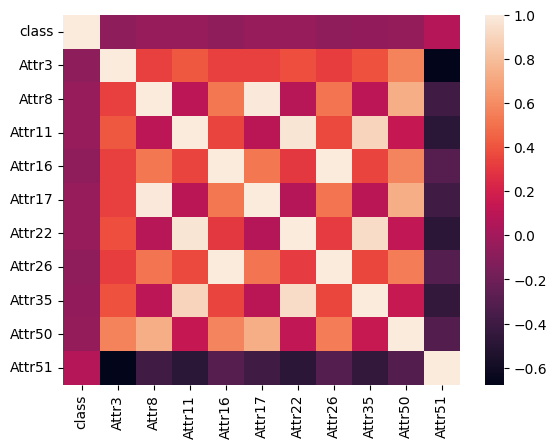

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

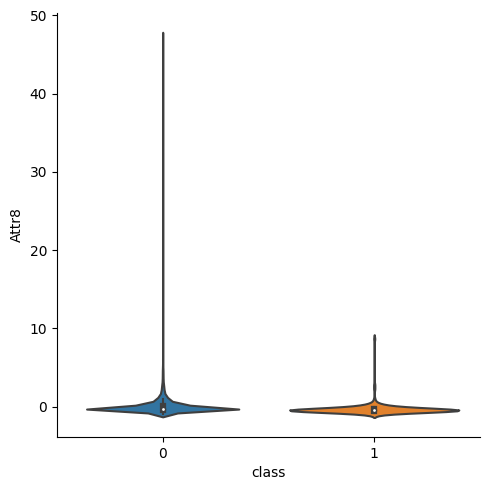

In [ ]:
sns.catplot(data=df, x="class", y="Attr8", kind="violin")

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Bankruptcy')

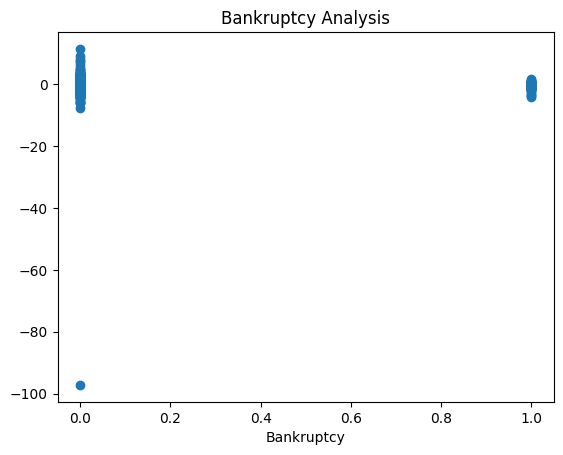

In [ ]:
plt.scatter(df["class"],df["Attr11"])
plt.title("Bankruptcy Analysis")
plt.xlabel("Bankruptcy")

In [ ]:
from scipy import stats
df["Attr8"] = stats.zscore(df["Attr8"] )

In [ ]:
df['class'].value_counts()

## Imbalance data. Need to handle sampling bias with SMOTE

0    9797
1     203
Name: class, dtype: int64

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state= 42)
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [54]:
## Logistic Regression Model
model = linear_model.LogisticRegression(random_state=42)
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("Logistic Regression Model Accuracy: ")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Logistic Regression Model Accuracy: 
accuracy :  0.7644


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
## Finding Precision:
print("precision is ", cm[1,1]/(cm[0,1]+cm[1,1]))

precision is  0.06891025641025642


In [56]:
## Finding Specificity
print("Specificity is ", cm[0,0]/(cm[0,0]+cm[1,0]))

Specificity is  0.9957356076759062


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


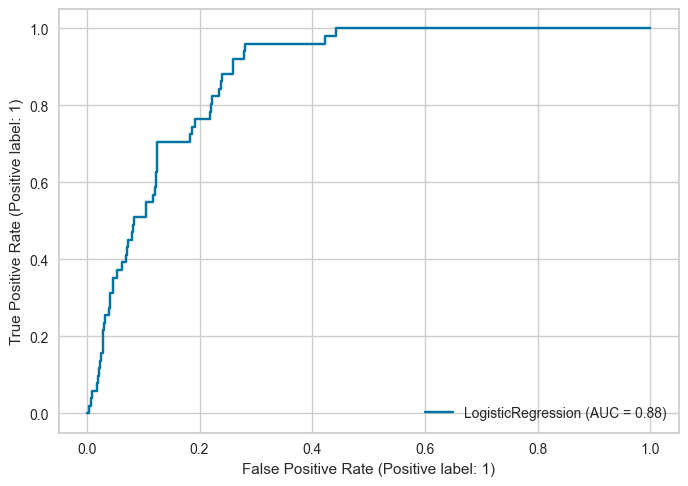

In [57]:
## Plotting the ROC curve
plot_roc_curve(model,x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


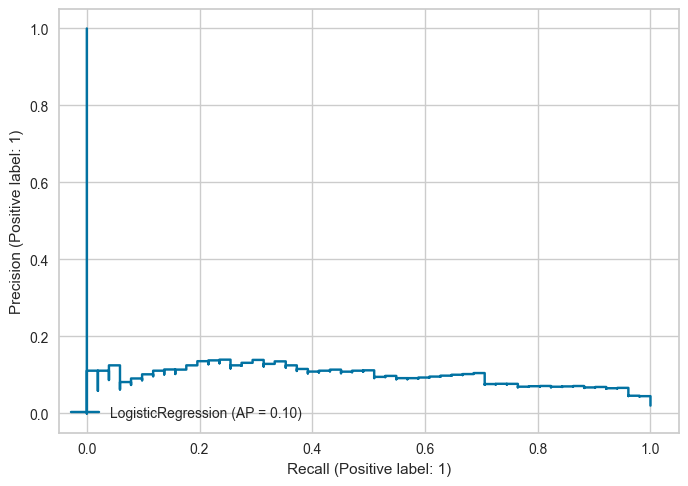

In [58]:

# Plotting Precision Recall Curve
plot_precision_recall_curve(model,x_test,y_test)

In [59]:
## Building a CART model
model = tree.DecisionTreeClassifier(max_depth = 19, random_state = 42)
model.fit(x_train, y_train)
cm = confusion_matrix(y_test,pred)
print("Decision Tree Accuracy: ")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


Decision Tree Accuracy: 
accuracy :  0.7644


In [60]:
## Building an ensemble model
model = ensemble.RandomForestClassifier(random_state= 42)
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("Random Forst Accuracy: ")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


Random Forst Accuracy: 
accuracy :  0.9728


In [61]:
model = ensemble.GradientBoostingClassifier(random_state=42)
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)

print("Gradient Boosting Classifier Accuracy:")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Gradient Boosting Classifier Accuracy:
accuracy :  0.9128


In [62]:
## Using Neural Network for
model = neural_network.MLPClassifier(random_state=42)
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("Neural Network Accuracy: ")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


Neural Network Accuracy: 
accuracy :  0.9696


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
## Using GridSearchCV to find the optimal parameters

## Warning: The following code block takes a while to run.
model = RandomForestClassifier()

# Define the parameters to be searched
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 30)]),cv=10)
grid = grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': 28}


In [ ]:
grid.best_score_

0.9616228356557054

In [69]:
## Using Kmeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(x)
pred = model.predict(x)
cm = confusion_matrix(y,pred)
print("Kmeans Accuracy: ")
print("accuracy : ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


Kmeans Accuracy: 
accuracy :  0.9796


In [70]:
## Satisfied with accuracy. Moving on to K elbow analysis
from yellowbrick.cluster import KElbowVisualizer


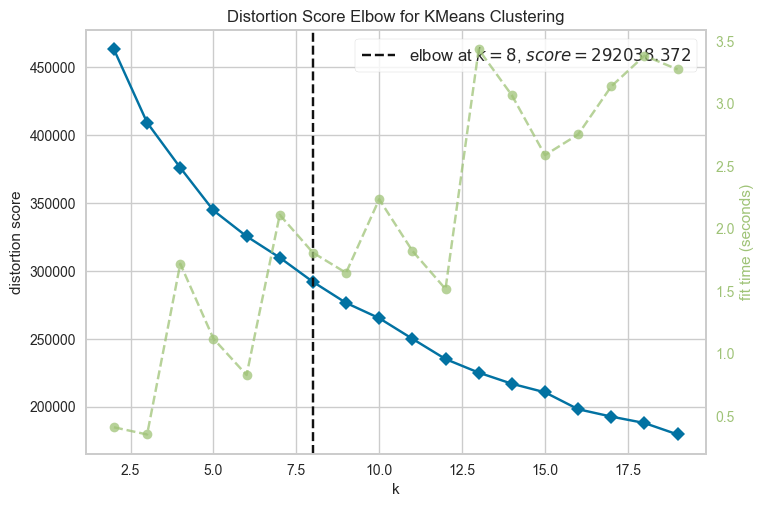

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
v = KElbowVisualizer(model,k = (2,20))
v.fit(x)
v.show()

<p> Based on the elbow method, the optimal K value is 8. 

The difference is caused by how Kmeans work. In essence, the original suggestion was 2, which represents if the client was worth crediting or if they were not creditable. It does not mean that there are only two clusters within this analysis. By using Kmeans, the system attempts to cluster customers based on the Eucledian distance between each data point and the center of the cluster. 

Hence, once the calculations are done, it will return the optimal value of k which in this case is 8.